**Import all required modules**

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

**Read data from income.csv file and store it in dataframe df**

In [2]:
df = pd.read_csv("../input/income/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


**Plots Scatter plot of Age and Income**

Text(0, 0.5, 'Income($)')

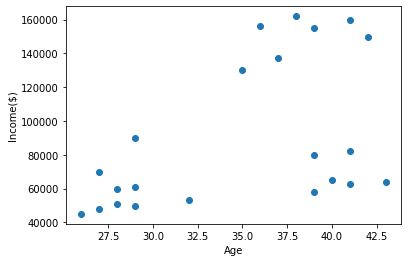

In [3]:
plt.scatter(df.Age, df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

**Trains and Predicts result using KMeans**

In [4]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age', 'Income($)']])
y_pred

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

**Creates new column cluster and store predicted result in it**

In [5]:
df['cluster'] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


**Prints coordinates of cluster centers**

In [6]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

**Add new column color in dataframe**

In [7]:
d_color = {0:'r', 1:'g', 2:'b'}
df['color'] = df['cluster'].apply(lambda x: d_color[x])
df.head()

,Name,Age,Income($),cluster,color
0,Rob,27,70000,0,r
1,Michael,29,90000,0,r
2,Mohan,29,61000,2,b
3,Ismail,28,60000,2,b
4,Kory,42,150000,1,g


**Plots Scatter plot of Age vs Income and plots centroid of clusters**

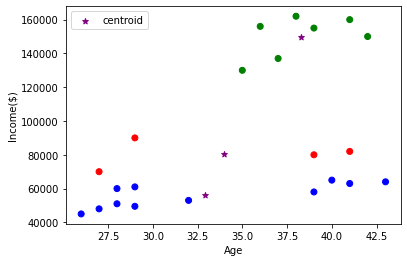

In [8]:
plt.scatter(df.iloc[:, 1], df.iloc[:, 2], c=df.color)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='centroid')
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()

**Standardize data in Age and Income column using MinMaxScaler**

In [9]:
sc = MinMaxScaler()

sc.fit(df[['Income($)']])
df['Income($)'] = sc.transform(df[['Income($)']])

sc.fit(df[['Age']])
df['Age'] = sc.transform(df[['Age']])

df.head()

,Name,Age,Income($),cluster,color
0,Rob,0.058824,0.213675,0,r
1,Michael,0.176471,0.384615,0,r
2,Mohan,0.176471,0.136752,2,b
3,Ismail,0.117647,0.128205,2,b
4,Kory,0.941176,0.897436,1,g


**Trains and Predicts result using standardize data**

In [10]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age', 'Income($)']])
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

**Updates result in cluster column**

In [11]:
df['cluster'] = y_pred
df.head()

,Name,Age,Income($),cluster,color
0,Rob,0.058824,0.213675,0,r
1,Michael,0.176471,0.384615,0,r
2,Mohan,0.176471,0.136752,0,b
3,Ismail,0.117647,0.128205,0,b
4,Kory,0.941176,0.897436,1,g


**Prints coordinates of updated cluster centers**

In [12]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

**Updates data in color column**

In [13]:
d_color = {0:'r', 1:'g', 2:'b'}
df['color'] = df['cluster'].apply(lambda x: d_color[x])
df.head()

,Name,Age,Income($),cluster,color
0,Rob,0.058824,0.213675,0,r
1,Michael,0.176471,0.384615,0,r
2,Mohan,0.176471,0.136752,0,r
3,Ismail,0.117647,0.128205,0,r
4,Kory,0.941176,0.897436,1,g


**Plots Scatter plot of Age vs Income and plots centroid of clusters for standardized data**

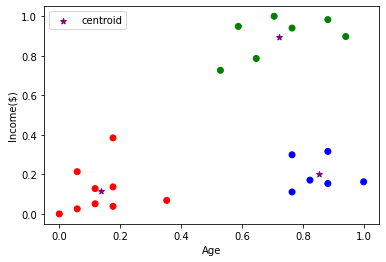

In [14]:
plt.scatter(df.iloc[:, 1], df.iloc[:, 2], c=df.color)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='centroid')
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()

**Plots Elbow plot**

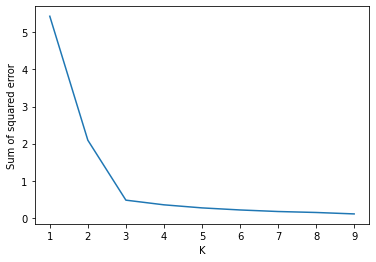

In [15]:
sse = []
k_rng = range(1, 10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)
    
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)